# **Energy Consumption Estimation - Linear Regression**

## About Dataset

Description:

This dataset is designed for predicting energy consumption based on various building features and environmental factors. It contains data for multiple building types, square footage, the number of occupants, appliances used, average temperature, and the day of the week. The goal is to build a predictive model to estimate energy consumption using these attributes.

The dataset can be used for training machine learning models such as linear regression to forecast energy needs based on the building's characteristics. This is useful for understanding energy demand patterns and optimizing energy consumption in different building types and environmental conditions.

**Provider:** GOVINDARAM SRIRAM

Reference: https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression/data

## About this notebook

For this notebook, we refer the source code shared by Parjwal Donger on Kaggle as a reference.
(https://www.kaggle.com/code/prajwaldongre/energy-consumption-eda-and-prediction-rmse-0-01/notebook)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
#%matplotlib inline

## Importing the dataset

In [2]:
filepath_train = "C:/Users/User/My Porject (Jupyter notebook)/Database/train_energy_data.csv"
filepath_test = "C:/Users/User/My Porject (Jupyter notebook)/Database/test_energy_data.csv"

data_train = pd.read_csv(filepath_train, header=0)
data_test = pd.read_csv(filepath_test, header=0)

In [3]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
data_train.head(5)

The first 5 rows of the dataframe


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [4]:
data_test.head(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


## Detail for the dataset 

- **Building Type:** Categorical feature representing the type of building.

    (Train data) <font color = orange>Residential: 35%, Commerical: 34%, Other: 32%</font>
    
    (Test data) <font color = orange>Residential: 40%, Commerical: 34%, Other: 26%</font>
   
- **Square Footage:** Numeric feature representing the total square footage of the building. 
- **Number of Occupants:** Numeric feature indicating the number of people occupying the building.
- **Appliances Used:** Numeric feature representing the number of appliances used in the building.
- **Average Temperature:** Numeric feature representing the average temperature of the building or climate area (in Celsius).
- **Day of Week:** Categorical feature representing whether the data point corresponds to a weekday or weekend.

    (Train data) <font color = orange>Weekday: 51%, Weekend: 49%</font>

    (Test data) <font color = orange>Weekday: 56%, Weekend: 44%</font>

- **Energy Consumption:** Numeric target variable representing the energy consumption of the building in kWh (kilowatt-hours). <font color = red>This is the value the model is tasked with predicting.</font>

### Train Data

In [5]:
data_train.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [7]:
data_train.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

### Test Data

In [8]:
data_test.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [10]:
data_test.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

## EDA

### Task 0.1 : Visualize individual feature patterns

#### Histogram for Energy Consumption

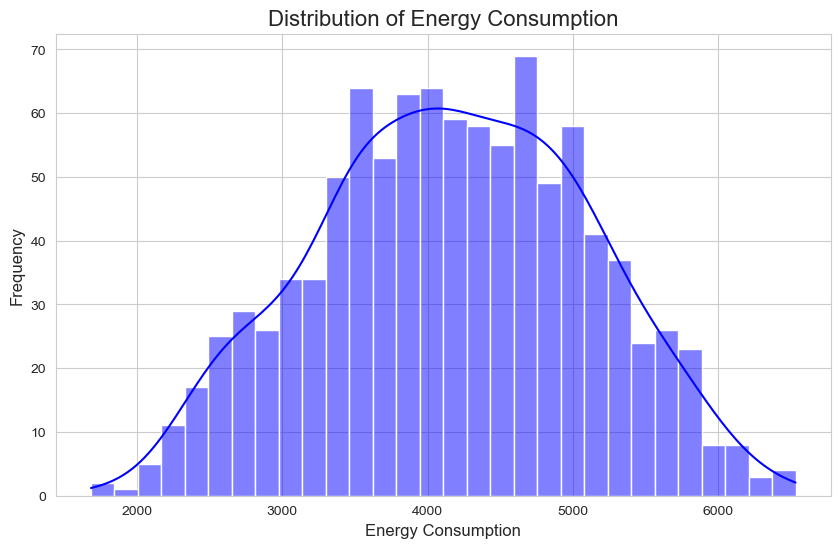

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data_train['Energy Consumption'], kde=True, color='blue', bins=30)
plt.title('Distribution of Energy Consumption', fontsize=16)
plt.xlabel('Energy Consumption', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Continuous valued features
Generate scatter plots and regression plots for each of the parameters "Square Footage", "Number of Occupants", "Appliances Used" and "Average Temperature" against "Energy Consumption". Also, print the value of correlation of each feature with "Energy Consumption".

<font color = orange> (1.1) Scatter plot of "Square Footage" vs "Energy Consumption"

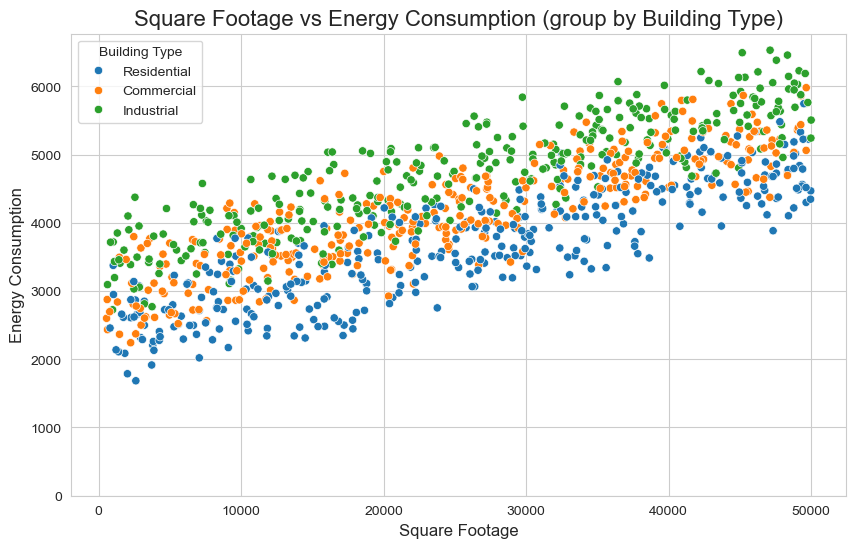

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Square Footage', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Square Footage vs Energy Consumption (group by Building Type)', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.ylim(0,)
plt.show()

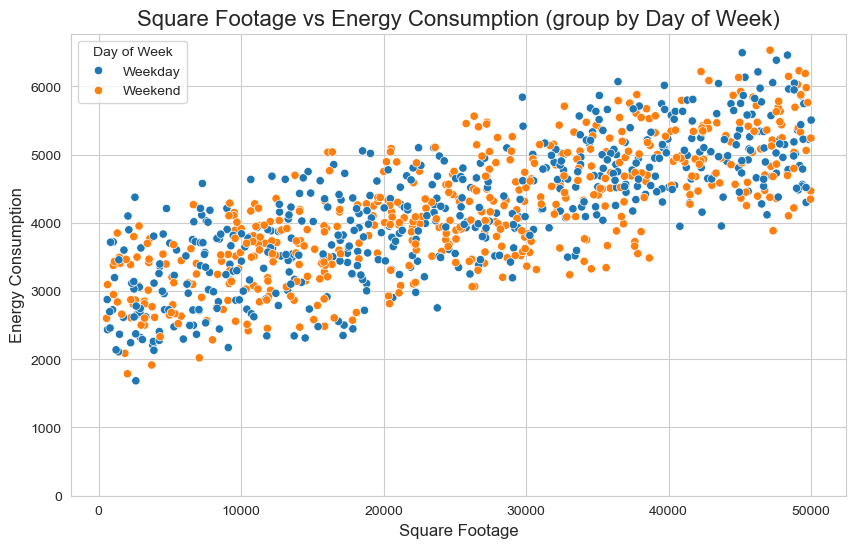

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Square Footage', y='Energy Consumption', hue='Day of Week', palette='tab10')
plt.title('Square Footage vs Energy Consumption (group by Day of Week)', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Day of Week')
plt.ylim(0,)
plt.show()

<font color = orange> (1.2) Regression plot of "Square Footage" vs "Energy Consumption"

Text(0, 0.5, 'Energy Consumption')

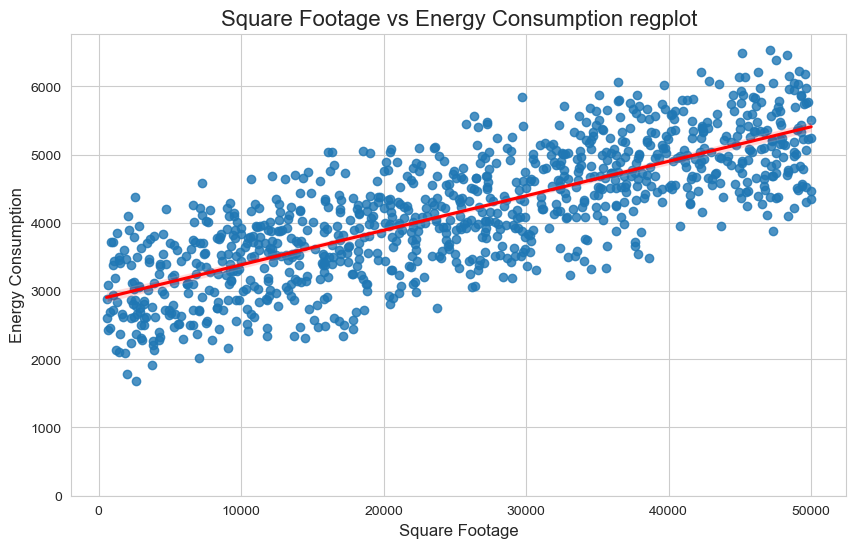

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Square Footage", y="Energy Consumption", data=data_train, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Square Footage vs Energy Consumption regplot', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)

<font color = orange> (2.1) Scatter plot of "Number of Occupants" vs "Energy Consumption"

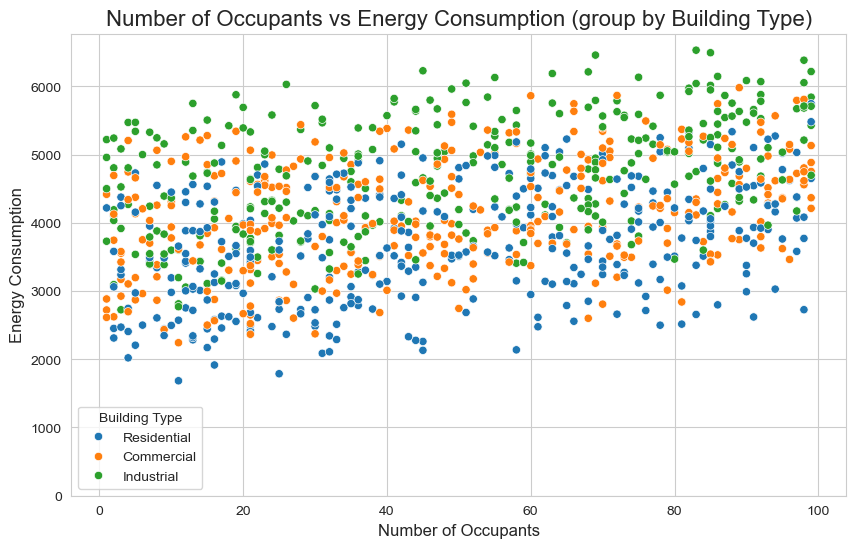

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Number of Occupants', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Number of Occupants vs Energy Consumption (group by Building Type)', fontsize=16)
plt.xlabel('Number of Occupants', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.ylim(0,)
plt.show()

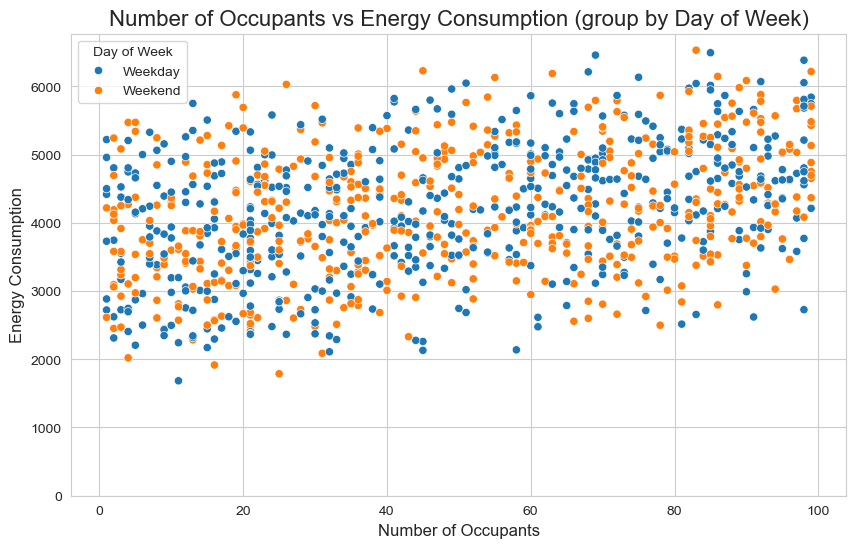

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Number of Occupants', y='Energy Consumption', hue='Day of Week', palette='tab10')
plt.title('Number of Occupants vs Energy Consumption (group by Day of Week)', fontsize=16)
plt.xlabel('Number of Occupants', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Day of Week')
plt.ylim(0,)
plt.show()

<font color = orange> (2.2) Regression plot of "Number of Occupants" vs "Energy Consumption"

Text(0, 0.5, 'Energy Consumption')

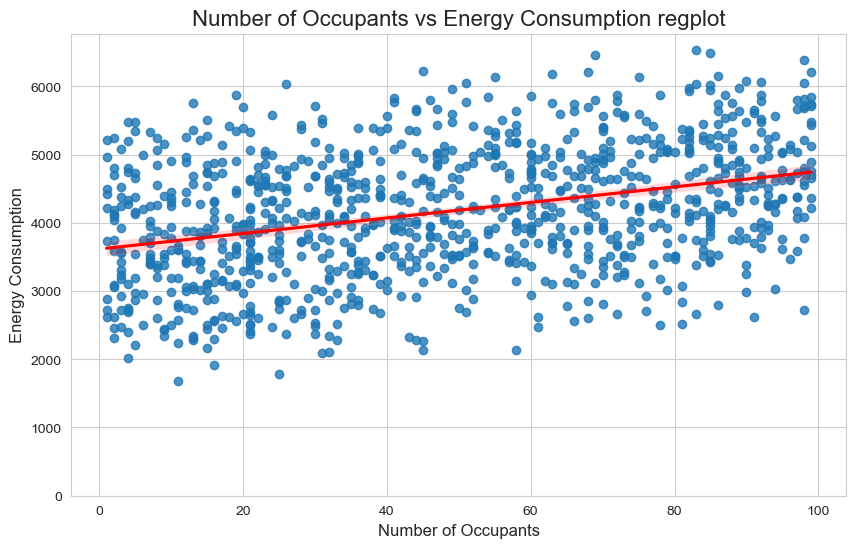

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Number of Occupants", y="Energy Consumption", data=data_train, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Number of Occupants vs Energy Consumption regplot', fontsize=16)
plt.xlabel('Number of Occupants', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)

<font color = orange> (3.1) Scatter plot of "Appliances Used" vs "Energy Consumption"

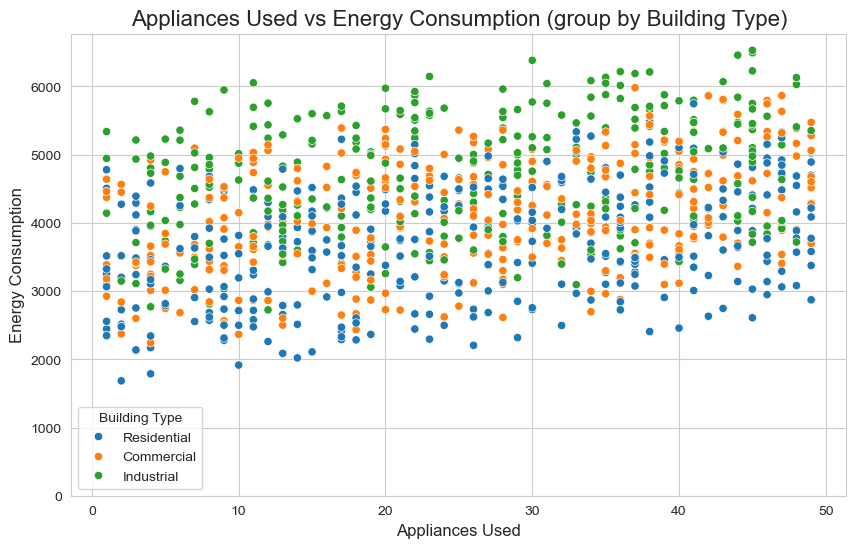

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Appliances Used', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Appliances Used vs Energy Consumption (group by Building Type)', fontsize=16)
plt.xlabel('Appliances Used', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.ylim(0,)
plt.show()

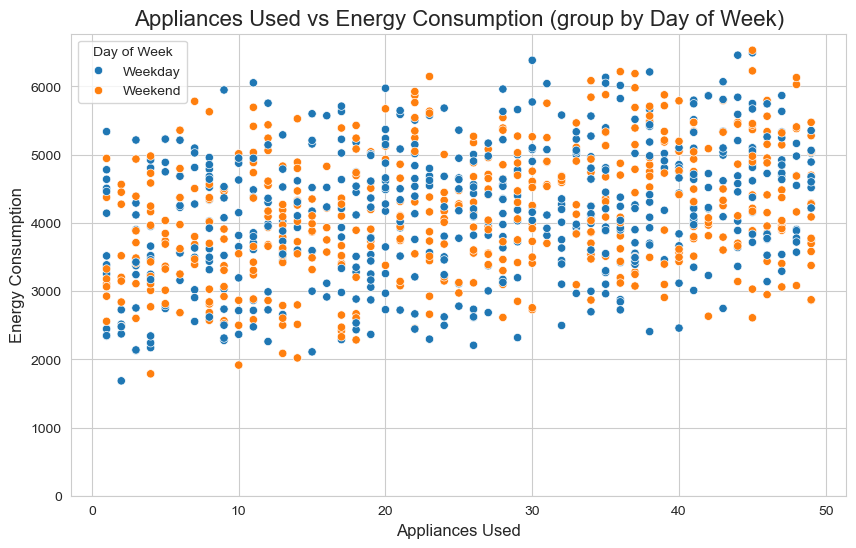

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Appliances Used', y='Energy Consumption', hue='Day of Week', palette='tab10')
plt.title('Appliances Used vs Energy Consumption (group by Day of Week)', fontsize=16)
plt.xlabel('Appliances Used', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Day of Week')
plt.ylim(0,)
plt.show()

<font color = orange> (3.2) Regression plot of "Appliances Used" vs "Energy Consumption"

Text(0, 0.5, 'Energy Consumption')

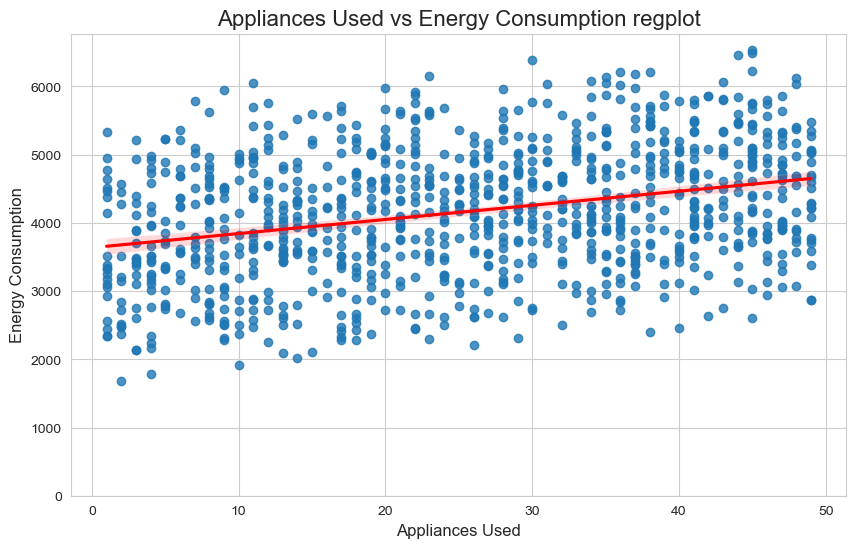

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Appliances Used", y="Energy Consumption", data=data_train, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Appliances Used vs Energy Consumption regplot', fontsize=16)
plt.xlabel('Appliances Used', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)

<font color = orange> (4.1) Scatter plot of "Average Temperature" vs "Energy Consumption"

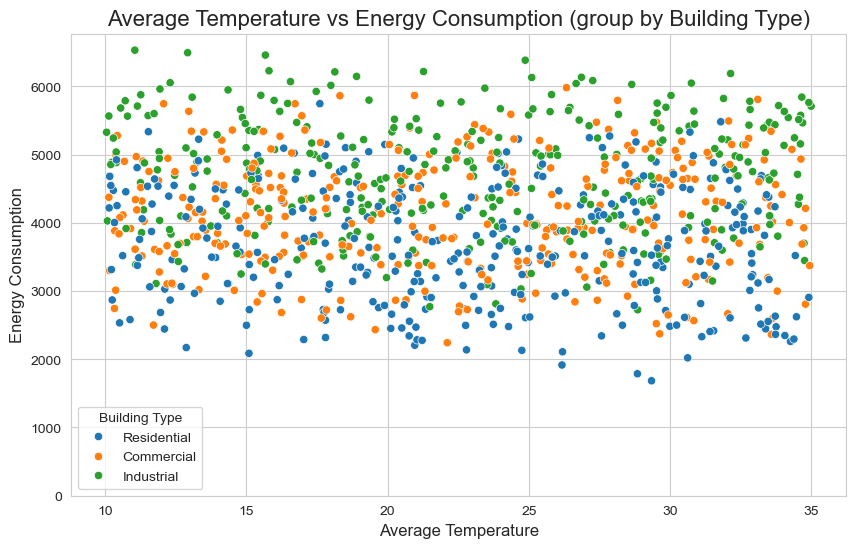

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Average Temperature', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Average Temperature vs Energy Consumption (group by Building Type)', fontsize=16)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.ylim(0,)
plt.show()

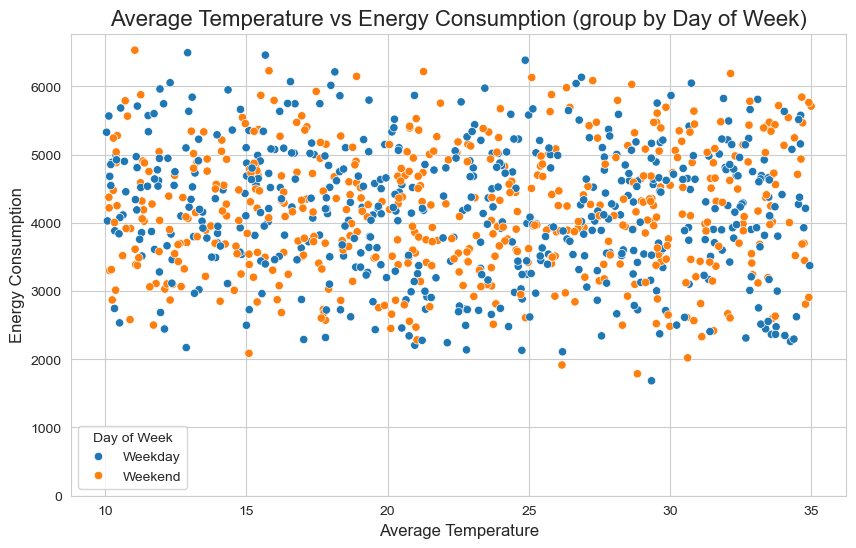

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_train, x='Average Temperature', y='Energy Consumption', hue='Day of Week', palette='tab10')
plt.title('Average Temperature vs Energy Consumption (group by Day of Week)', fontsize=16)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Day of Week')
plt.ylim(0,)
plt.show()

<font color = orange> (4.2) Regression plot of "Average Temperature" vs "Energy Consumption"

Text(0, 0.5, 'Energy Consumption')

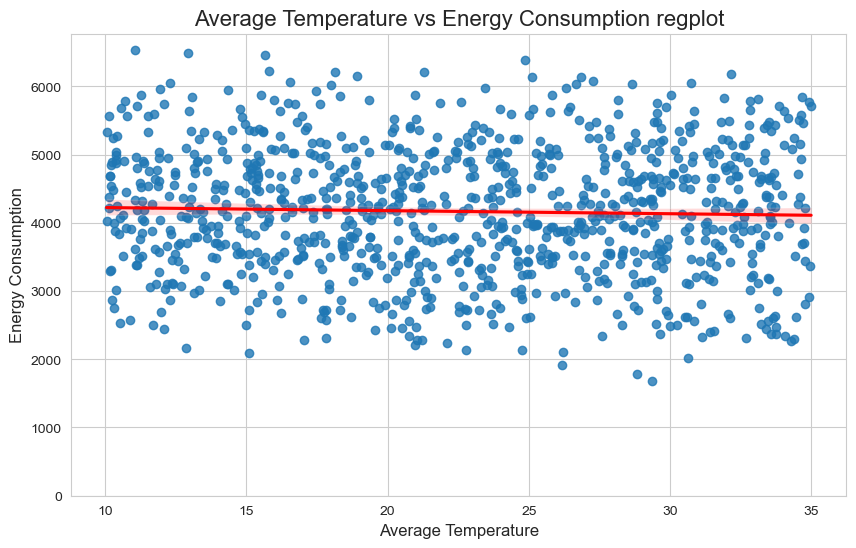

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Average Temperature", y="Energy Consumption", data=data_train, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Average Temperature vs Energy Consumption regplot', fontsize=16)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)

Interpretation: 
 - Sauare footage:
     - Residential buildings show a wide range of energy consumption values for a given square footage. This suggests that factors other than size, such as energy efficiency measures, appliances, and occupant behavior, significantly influence energy use in residential buildings.
     - Commercial buildings also exhibit a spread in energy consumption, but the trend seems to be more linear compared to residential. This might indicate a greater influence of building size on energy consumption in commercial settings.
     - Industrial buildings generally have the highest energy consumption across all square footage ranges. This is likely due to the energy-intensive nature of industrial processes and equipment.
 - Others:
     - The data grouped by "Day of Week" are more evenly distributed, making it more difficult to provide reliable information.
     - Industrial buildings generally have the highest energy consumption (for all continuous features).

In [24]:
# Correlation values of the four attributes with Energy Consumption
data_train[["Square Footage","Number of Occupants","Appliances Used","Average Temperature","Energy Consumption"]].corr()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
Square Footage,1.000000,0.033379,-0.013478,0.027273,0.774873
Number of Occupants,0.033379,1.000000,0.023646,0.014122,0.354485
Appliances Used,-0.013478,0.023646,1.000000,-0.062870,0.312792
Average Temperature,0.027273,0.014122,-0.062870,1.000000,-0.034487
Energy Consumption,0.774873,0.354485,0.312792,-0.034487,1.000000


Interpretation: "Square Footage	" has a 77% positive correlation with the energy consumption. The other three parameters have weak correlation with energy consumption.

#### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Building Type", "Day of Week"

Text(0, 0.5, 'Energy Consumption')

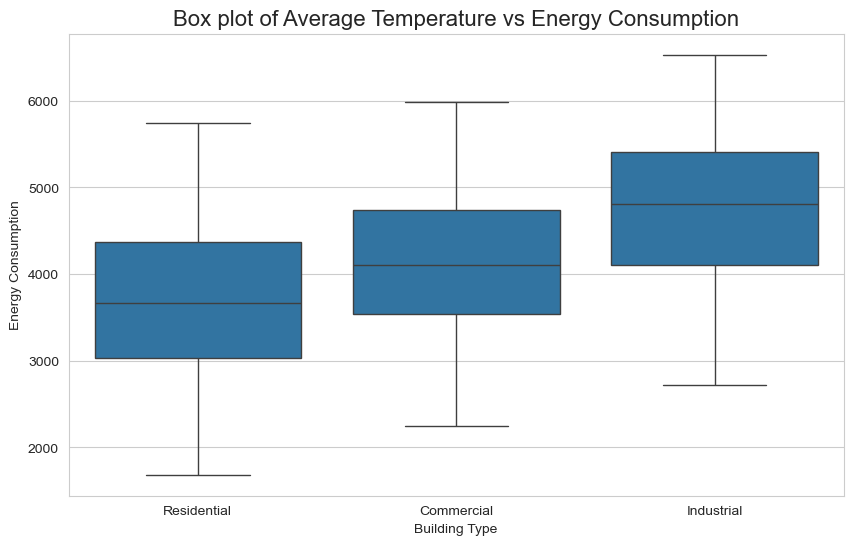

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Building Type", y="Energy Consumption", data=data_train)
plt.title('Box plot of Average Temperature vs Energy Consumption', fontsize=16)
plt.ylabel('Energy Consumption')

Text(0, 0.5, 'Energy Consumption')

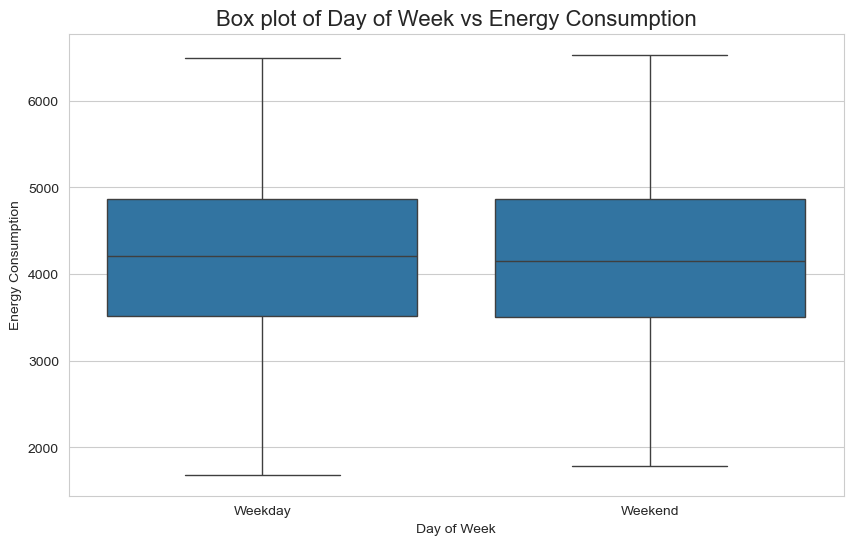

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Day of Week", y="Energy Consumption", data=data_train)
plt.title('Box plot of Day of Week vs Energy Consumption', fontsize=16)
plt.ylabel('Energy Consumption')

## Task 0.2 : Descriptive Statistical Analysis

Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [27]:
print(data_train.describe())
print(data_train.describe(include=['object']))

       Square Footage  Number of Occupants  Appliances Used  \
count        1000.000          1000.000000      1000.000000   
mean        25462.388            48.372000        25.606000   
std         14294.554            29.061972        14.105166   
min           560.000             1.000000         1.000000   
25%         13169.750            22.000000        13.000000   
50%         25477.000            47.000000        26.000000   
75%         37446.250            73.250000        38.000000   
max         49997.000            99.000000        49.000000   

       Average Temperature  Energy Consumption  
count          1000.000000         1000.000000  
mean             22.611390         4166.252570  
std               7.139943          933.313064  
min              10.050000         1683.950000  
25%              16.475000         3509.482500  
50%              22.815000         4175.730000  
75%              28.850000         4863.850000  
max              34.990000         6530.

## Task 0.3 - GroupBy and Pivot Tables

Group the parameters "Building Type", "Day of Week" and "Energy Consumption" to make a pivot table and visualize this connection using the pcolor plot.

In [28]:
# Create the group
df_group_1 = data_train[["Building Type", "Day of Week", "Energy Consumption"]]
df_grouped_1 = df_group_1.groupby(["Building Type", "Day of Week"],as_index=False).mean()
df_grouped_1

,Building Type,Day of Week,Energy Consumption
0,Commercial,Weekday,4116.690479
1,Commercial,Weekend,4143.198876
2,Industrial,Weekday,4747.906624
3,Industrial,Weekend,4722.617938
4,Residential,Weekday,3723.662022
5,Residential,Weekend,3634.721280


In [29]:
# Create the Pivot table
df_grouped_1_pivot = df_grouped_1.pivot(index="Building Type",columns="Day of Week")
df_grouped_1_pivot

Energy Consumption             
Day of Week              Weekday      Weekend
Building Type                                
Commercial           4116.690479  4143.198876
Industrial           4747.906624  4722.617938
Residential          3723.662022  3634.721280

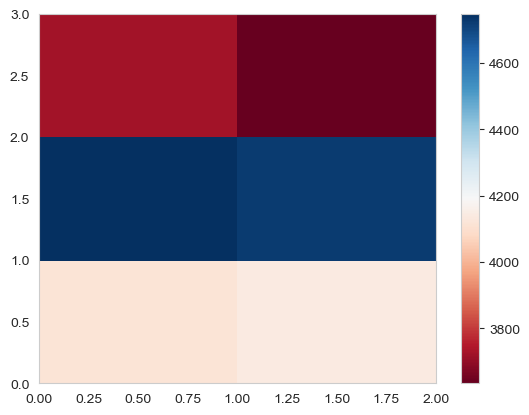

In [30]:
# Create the Plot
plt.pcolor(df_grouped_1_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

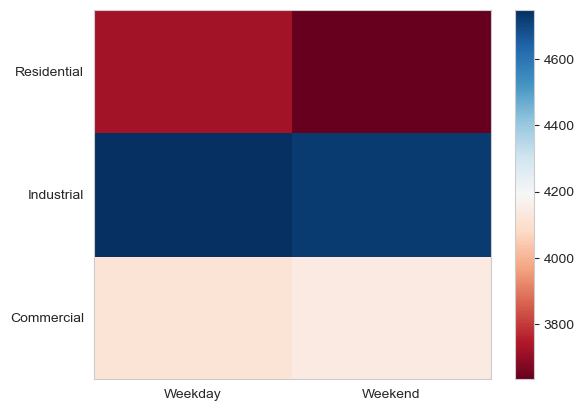

In [31]:
# Rename label and Adjust scale

fig, ax = plt.subplots()
im = ax.pcolor(df_grouped_1_pivot, cmap='RdBu')

# label names
row_labels = df_grouped_1_pivot.columns.levels[1]
col_labels = df_grouped_1_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(df_grouped_1_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_grouped_1_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

## Task 0.3.5 : Convert categorical features into numerical form

- **Building Type:** Categorical feature representing the type of building.

   <font color = orange> Set Residential = 1, Commercial = 2, Industrial = 3</font>
   
- **Day of Week:** Categorical feature representing whether the data point corresponds to a weekday or weekend.

    <font color = orange> Set Weekday = 1, Weekend = 2</font>

In [32]:
df = data_train

# Replace Building type
df = df.replace("Residential",1)
df = df.replace("Commercial",2)
df = df.replace("Industrial",3)

# Replace Day of week
df = df.replace("Weekday",1)
df = df.replace("Weekend",2)

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9424\2123280178.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("Industrial",3)
C:\Users\User\AppData\Local\Temp\ipykernel_9424\2123280178.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("Weekend",2)


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,1,7063,76,10,29.84,1,2713.95
1,2,44372,66,45,16.72,1,5744.99
2,3,19255,37,17,14.30,2,4101.24
3,1,13265,14,41,32.82,1,3009.14
4,2,13375,26,18,11.92,1,3279.17


Building Type and Day of Week are in type "int".

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   int64  
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   int64  
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


## Task 0.4 : Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [34]:
for i in ["Building Type", "Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Day of Week"]:
    pearson_coef, p_value = stats.pearsonr(df[i], df['Energy Consumption'])
    print(i)
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    print('')

Building Type
The Pearson Correlation Coefficient is 0.45878303528288716  with a P-value of P = 3.332231613972303e-53

Square Footage
The Pearson Correlation Coefficient is 0.7748725947989465  with a P-value of P = 5.115950281679274e-201

Number of Occupants
The Pearson Correlation Coefficient is 0.35448469498101226  with a P-value of P = 5.601955811060827e-31

Appliances Used
The Pearson Correlation Coefficient is 0.31279171635568825  with a P-value of P = 3.889707099088072e-24

Average Temperature
The Pearson Correlation Coefficient is -0.0344871597473029  with a P-value of P = 0.2759158945828267

Day of Week
The Pearson Correlation Coefficient is -0.004392894812409901  with a P-value of P = 0.889653667226514



## Model Building

One-Hot Encoding for Categorical features

In [35]:
data_train_encoded = pd.get_dummies(data_train, columns=['Building Type', 'Day of Week'], drop_first=True)

data_train_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False


### Random Forest

In [36]:
X = data_train_encoded.drop(columns=['Energy Consumption'])
y = data_train_encoded['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 124.81082260664614


<font color = orange>Fine tune Random Forest

In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE from GridSearchCV: {best_rmse}")

# Re-training the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"RMSE after Hyperparameter Tuning: {rmse_best}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE from GridSearchCV: 144.81536804274333
RMSE after Hyperparameter Tuning: 125.48686414104534


### Gradient Boosting Regressor

In [38]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"RMSE for Gradient Boosting: {rmse_gb}")

RMSE for Gradient Boosting: 94.16821169574179


<font color = orange> Fine tune Gradient Boosting

In [40]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error')

In [41]:
# Best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_rmse_gb = -grid_search_gb.best_score_

print(f"Best Hyperparameters for Gradient Boosting: {best_params_gb}")
print(f"Best RMSE from GridSearchCV: {best_rmse_gb}")

best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluating the performance
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
print(f"RMSE after Hyperparameter Tuning for Gradient Boosting: {rmse_best_gb}")

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE from GridSearchCV: 83.10146808523996
RMSE after Hyperparameter Tuning for Gradient Boosting: 81.84126559560765


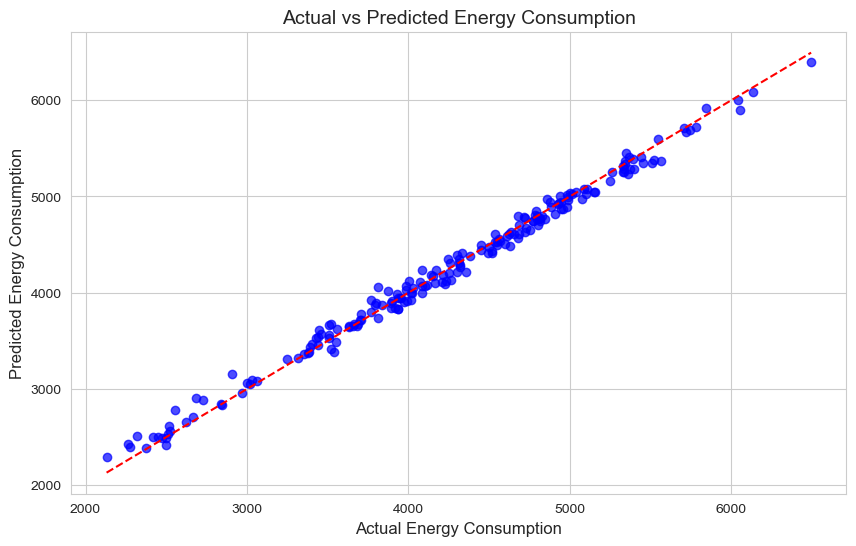

In [42]:
y_pred_final = best_gb_model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Energy Consumption', fontsize=14)
plt.xlabel('Actual Energy Consumption', fontsize=12)
plt.ylabel('Predicted Energy Consumption', fontsize=12)
plt.grid(True)
plt.show()

### XGBoost Regressor

In [39]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"RMSE for XGBoost: {rmse_xgb}")

RMSE for XGBoost: 111.8356719170143


### Linear Regression

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE for Linear Regression: {rmse_lr}")

RMSE for Linear Regression: 0.013731382133104523


## Compare each Model

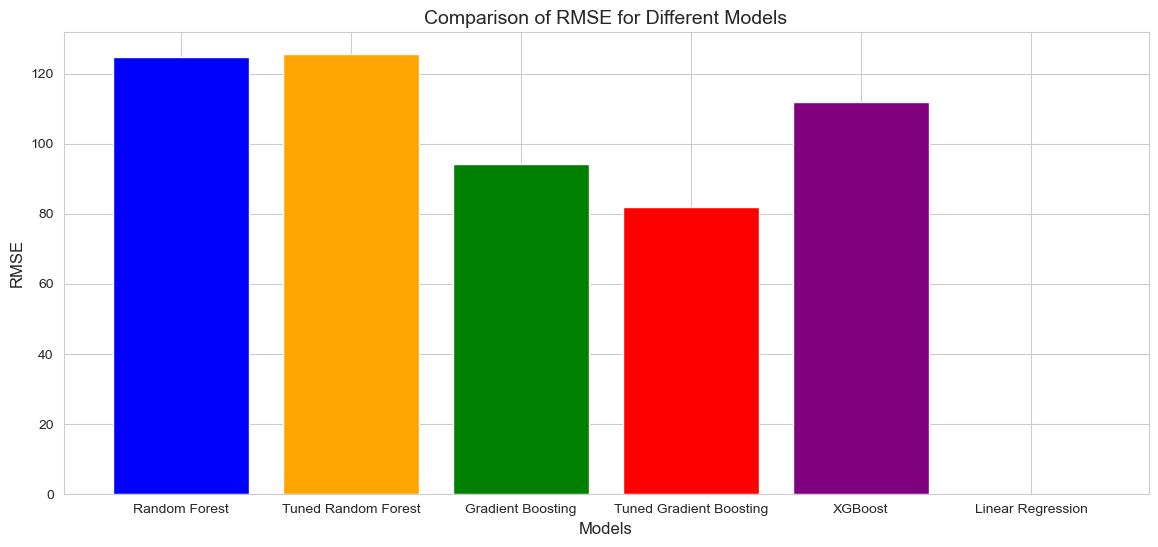

In [44]:
models = ['Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'Linear Regression']
rmse_values = [124.81, 125.49, 94.17, 81.84, 111.84, 0.0137]

plt.figure(figsize=(14, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

plt.title('Comparison of RMSE for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.show()

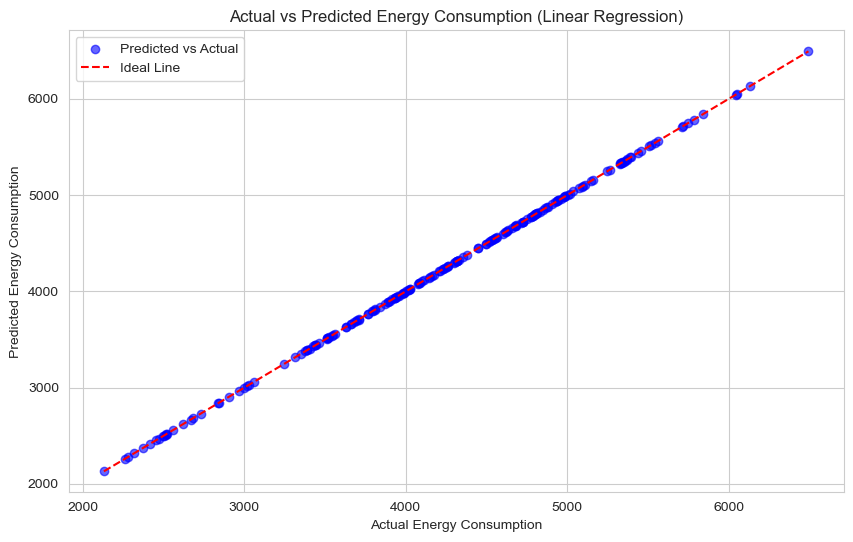

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
df_actual_predicted_lr = pd.DataFrame({
    'Actual Energy Consumption': y_test,
    'Predicted Energy Consumption (LR)': y_pred_lr
})

print(df_actual_predicted_lr.head())

     Actual Energy Consumption  Predicted Energy Consumption (LR)
521                    4549.59                        4549.598244
737                    2842.91                        2842.901083
740                    5781.83                        5781.847788
660                    4773.54                        4773.550577
411                    3791.04                        3791.050217


## Evaluate the models using the test data set

One-Hot Encoding for Categorical features with test data.

In [47]:
data_test_encoded = pd.get_dummies(data_test, columns=['Building Type', 'Day of Week'], drop_first=True)

data_test_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28.52,2865.57,False,True,False
1,27583,56,23,23.07,4283.80,False,False,True
2,45313,4,44,33.56,5067.83,False,False,False
3,41625,84,17,27.39,4624.30,False,True,True
4,36720,58,47,17.08,4820.59,False,True,False


In [48]:
Xtest = data_test_encoded.drop(columns=['Energy Consumption'])
ytest = data_test_encoded['Energy Consumption']

# Random Forest
y_pred = rf_model.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print(f"Model: Random Forest, (RMSE): {rmse}")

# Fine tune Random Forest
y_pred_best = best_rf_model.predict(Xtest)
rmse_best = np.sqrt(mean_squared_error(ytest, y_pred_best))
print(f"Model: Fine tune Random Forest, (RMSE): {rmse_best}")

# Gradient Boosting Regressor
y_pred_gb = gb_model.predict(Xtest)
rmse_gb = np.sqrt(mean_squared_error(ytest, y_pred_gb))
print(f"Model: Gradient Boosting Regressor, (RMSE): {rmse_gb}")

# Fine tune Gradient Boosting
y_pred_best_gb = best_gb_model.predict(Xtest)
rmse_best_gb = np.sqrt(mean_squared_error(ytest, y_pred_best_gb))
print(f"Model: Fine tune Gradient Boosting Regressor, (RMSE): {rmse_best_gb}")

# XGBoost Regressor
y_pred_xgb = xgb_model.predict(Xtest)
rmse_xgb = np.sqrt(mean_squared_error(ytest, y_pred_xgb))
print(f"Model: XGBoost Regressor, (RMSE): {rmse_xgb}")

# Linear Regression
y_pred_lr = lr_model.predict(Xtest)
rmse_lr = np.sqrt(mean_squared_error(ytest, y_pred_lr))
print(f"RMSE for Linear Regression: {rmse_lr}")

Model: Random Forest, (RMSE): 124.5609943955501
Model: Fine tune Random Forest, (RMSE): 127.10990607160144
Model: Gradient Boosting Regressor, (RMSE): 85.28336375258048
Model: Fine tune Gradient Boosting Regressor, (RMSE): 77.93541181749235
Model: XGBoost Regressor, (RMSE): 129.68936602247254
RMSE for Linear Regression: 0.01416724710785934


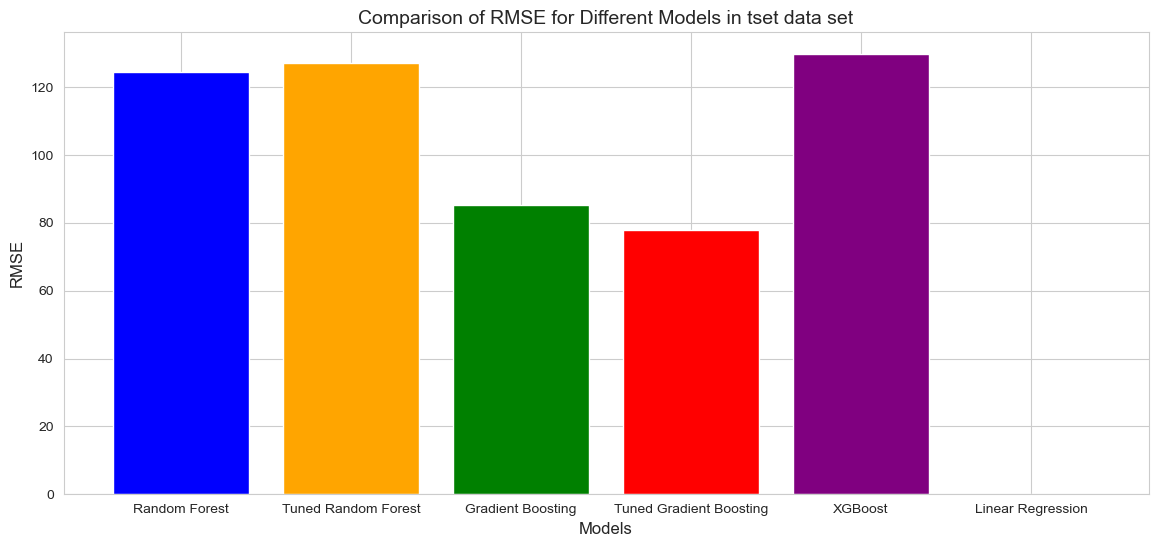

In [51]:
models = ['Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'Linear Regression']
rmse_values = [124.56, 127.11, 85.28, 77.94, 129.69, 0.014]

plt.figure(figsize=(14, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

plt.title('Comparison of RMSE for Different Models in tset data set', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.show()

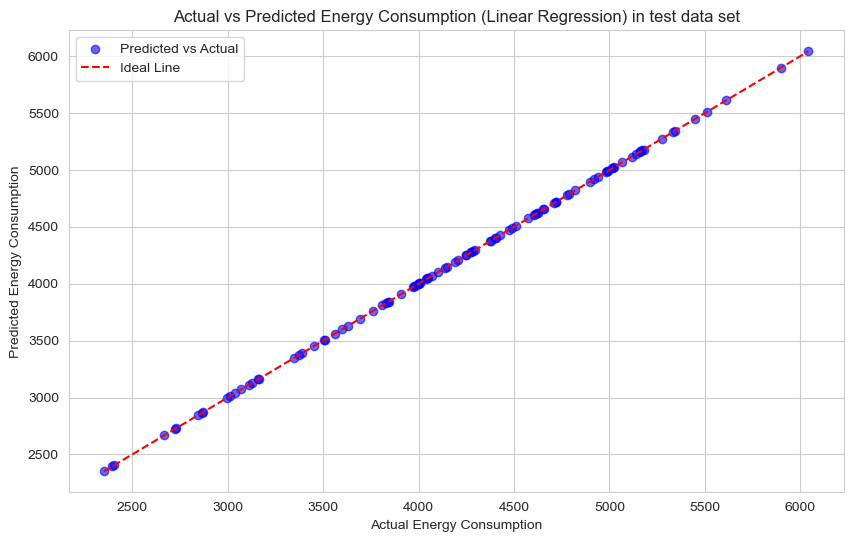

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred_lr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption (Linear Regression) in test data set')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
df_actual_predicted_lr = pd.DataFrame({
    'Actual Energy Consumption': ytest,
    'Predicted Energy Consumption (LR)': y_pred_lr
})

print(df_actual_predicted_lr.head())

   Actual Energy Consumption  Predicted Energy Consumption (LR)
0                    2865.57                        2865.549195
1                    4283.80                        4283.799407
2                    5067.83                        5067.849089
3                    4624.30                        4624.298336
4                    4820.59                        4820.601116
